In [ ]:
'''
Data fields

DBNOs - Number of enemy players knocked.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)

killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. This may be misleading, 
              as downing a player and driving away may lead to a large longestKill stat.
              
matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)

groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, 
          they will have a different groupId each time.
          
numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data 
           skips over placements.
           
winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, 
               and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, 
               so it is possible to have missing chunks in a match.
'''

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#set max display column values
pd.set_option('display.max_columns', 100)

In [3]:
# read dataset
pubg = pd.read_csv('train.csv')

In [37]:
pubg.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571,Duo
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400,Squad
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407,Duo
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146,Solo
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217,Duo


C:\Users\srbhs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


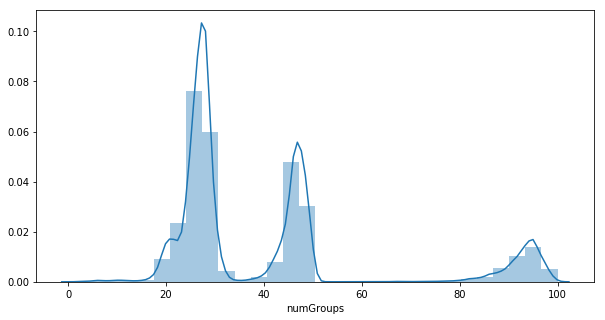

In [8]:
# plotting distribution for number of groups
plt.figure(figsize=(10,5))
sns.distplot(pubg['numGroups'], bins=30)

In [36]:
# adding an extra column: Match Type
def match_type(x):
    if x <= 25:
        return 'Squad'
    elif (x > 25) & (x <= 50):
        return 'Duo'
    else:
        return 'Solo'

pubg['matchType'] = pubg['numGroups'].apply(match_type)

In [119]:
# function to display match stats
def match_stats(x):
    print('\n')
    t = pubg[pubg['matchId'] == x]['matchType'].iloc[0]
    print('***** Match Type:', t + ' *****')
    print('Match ID: ', x)
    
    print('Max Assists:', pubg[pubg['matchId'] == x]['assists'].max())
    
    print('Max Boosts Used:', pubg[pubg['matchId'] == x]['boosts'].max())
    
    print('Max Damage Dealt: {:.3f}'.format(pubg[pubg['matchId'] == x].groupby('groupId').sum()['damageDealt'].max()))
    
    print('Max Damage Dealt by Winning Group: {:.3f}'.format(pubg[(pubg['matchId'] == x) & (pubg['winPlacePerc'] == 1)].groupby('groupId').sum()['damageDealt'].iloc[0]))
    
    if t == 'Solo':
        print('Max Knockouts: 0')
    else:
        print('Max Knockouts:', pubg[pubg['matchId'] == x].groupby('groupId').sum()['DBNOs'].max())
    
    print('Max Headshot Kills by a Group:', pubg[pubg['matchId'] == x].groupby('groupId').sum()['headshotKills'].max())
    return                                                                                                                      

In [108]:
#for single match
m_id = int(input('Enter Match ID: '))
match_stats(m_id)

Enter Match ID: 15


***** Match Type: Duo *****
Max Assists: 3
Max Boosts Used: 6
Max Damage Dealt: 1297.9
Max Damage Dealt by Winning Group: 553.2
Max Knockouts: 6
Max Headshot Kills by a Group: 6


In [120]:
#for multiple matches
m_id = list(map(int, input("Enter Match ID's: ").split()))
for i in m_id:
    match_stats(i)

Enter Match ID's: 1245 4378 6429 9127


***** Match Type: Squad *****
Match ID:  1245
Max Assists: 2
Max Boosts Used: 5
Max Damage Dealt: 1200.500
Max Damage Dealt by Winning Group: 829.200
Max Knockouts: 8
Max Headshot Kills by a Group: 4


***** Match Type: Squad *****
Match ID:  4378
Max Assists: 2
Max Boosts Used: 5
Max Damage Dealt: 1614.100
Max Damage Dealt by Winning Group: 1614.100
Max Knockouts: 12
Max Headshot Kills by a Group: 4


***** Match Type: Solo *****
Match ID:  6429
Max Assists: 1
Max Boosts Used: 10
Max Damage Dealt: 1557.000
Max Damage Dealt by Winning Group: 1557.000
Max Knockouts: 0
Max Headshot Kills by a Group: 6


***** Match Type: Duo *****
Match ID:  9127
Max Assists: 3
Max Boosts Used: 5
Max Damage Dealt: 984.000
Max Damage Dealt by Winning Group: 910.800
Max Knockouts: 6
Max Headshot Kills by a Group: 4


### Work in Progress!!!!! More Coming.....